# Ejemplo de Clasificador basado en Red Completamente Conectada con explicabilidad de las variables con Shap.

Este es un ejemplo de clasificador basado en una Red Completamente Conectada (MLP). El objetivo del clasificador es pronósticar si la suma de dos enteros es múltiplo de 3 (etiqueta 0) o no (etiqueta 1). Se utiliza Shap (Deep SHapley Additive exPlanations) para explicar qué variables son más importantes para el resultado.

## Importar librerías

In [1]:
# seed the pseudorandom number generator
from random import seed
import random
from random import randint

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import scipy.stats
from pylab import *

In [5]:
import tensorflow as tf

from tensorflow.python.keras.layers import Dense, Dropout,Convolution1D, MaxPooling1D, Flatten
from tensorflow.python.keras.layers import BatchNormalization, Activation, ReLU, Dense, Dropout, Activation 
from tensorflow.python.keras import Sequential, Input, Model
from tensorflow import keras

from keras.models import Sequential  # Model type to be used

#from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
#from keras.utils import np_utils                         # NumPy related tools

In [ ]:
# Es necesario bajar a la versión 1.15 de tensorflow para que shap funcione.
#%tensorflow_version 1.x

# No es necesario bajar a la versión 1.15 siempre y cuando se utilice "KernelExplainer". 
# Si se quiere utilizar "DeepExplainer" entonces sí es necesario bajar a la versióón 1.15.

In [7]:
# Se verifica la versión de TensorFlow
print(tf.__version__)

2.6.0


In [8]:
from sklearn.metrics import mean_squared_error

## Fijar semilla del generador de números aleatorios

In [ ]:
#seed(1234)

## Generados dos listas de números aleatorios y sumarlos

In [9]:
# Definición de la longitud de las listas.
list_lenght=1000

In [10]:
randomList1 = []
# Set a length of the list to 10
for i in range(0, list_lenght):
    # any random numbers from 0 to 10
    randomList1.append(randint(0, 10))


print("Primera lista", randomList1)

Primera lista [6, 2, 2, 8, 4, 5, 7, 5, 8, 2, 7, 4, 4, 7, 7, 6, 5, 4, 1, 4, 0, 9, 3, 6, 9, 3, 7, 9, 9, 0, 5, 8, 4, 3, 6, 3, 6, 0, 4, 2, 1, 6, 5, 6, 3, 9, 8, 2, 9, 2, 5, 0, 3, 3, 1, 5, 1, 9, 1, 5, 8, 4, 6, 7, 9, 0, 7, 1, 4, 3, 2, 0, 8, 6, 4, 2, 5, 5, 5, 3, 7, 8, 9, 7, 7, 4, 2, 5, 3, 3, 4, 2, 8, 6, 6, 1, 6, 6, 8, 5, 1, 4, 1, 8, 0, 8, 2, 7, 1, 7, 1, 0, 8, 0, 2, 3, 6, 9, 9, 0, 6, 7, 8, 0, 6, 2, 3, 7, 2, 7, 4, 8, 2, 8, 8, 9, 6, 7, 5, 6, 8, 7, 6, 5, 9, 5, 7, 7, 8, 7, 2, 1, 1, 7, 1, 6, 0, 9, 8, 7, 2, 8, 5, 7, 3, 6, 5, 7, 3, 0, 6, 5, 2, 5, 8, 4, 5, 9, 6, 9, 4, 7, 5, 9, 9, 3, 8, 9, 8, 7, 4, 4, 0, 0, 3, 2, 6, 2, 4, 1, 6, 4, 6, 7, 8, 4, 5, 2, 1, 1, 0, 5, 4, 0, 1, 3, 5, 5, 0, 9, 1, 4, 2, 7, 6, 3, 8, 6, 1, 4, 4, 8, 2, 4, 0, 5, 3, 8, 0, 2, 4, 7, 1, 4, 1, 0, 3, 8, 2, 7, 8, 9, 0, 4, 9, 8, 9, 7, 2, 5, 8, 9, 5, 1, 0, 5, 2, 4, 5, 5, 4, 8, 9, 7, 6, 6, 1, 2, 9, 8, 5, 1, 2, 0, 9, 6, 8, 2, 7, 1, 7, 0, 2, 0, 4, 1, 8, 8, 7, 6, 8, 9, 1, 4, 3, 4, 0, 3, 0, 1, 3, 0, 5, 0, 4, 7, 0, 8, 9, 4, 0, 2, 4, 5, 1, 7, 3, 8, 0

In [11]:
randomList2 = []
# Set a length of the list to 10
for i in range(0, list_lenght):
    # any random numbers from 0 to 10
    randomList2.append(randint(0, 10))

print("Printing list of 10 random numbers")
print("Segunda lista",randomList2)

Printing list of 10 random numbers
Segunda lista [5, 0, 5, 4, 3, 8, 1, 9, 6, 3, 3, 7, 5, 0, 7, 9, 4, 1, 0, 6, 7, 6, 8, 8, 6, 1, 9, 5, 6, 0, 1, 3, 2, 0, 3, 1, 3, 5, 1, 6, 4, 8, 3, 0, 0, 7, 0, 8, 5, 3, 4, 5, 7, 4, 1, 6, 4, 2, 6, 1, 0, 8, 9, 5, 7, 5, 8, 8, 6, 8, 1, 8, 9, 2, 6, 6, 3, 4, 7, 1, 4, 6, 9, 1, 4, 4, 9, 3, 0, 1, 9, 1, 7, 9, 9, 6, 4, 8, 1, 3, 7, 9, 2, 0, 2, 3, 6, 9, 7, 9, 8, 4, 7, 6, 0, 6, 0, 4, 9, 7, 7, 2, 6, 2, 5, 5, 9, 8, 1, 4, 7, 6, 8, 7, 5, 6, 6, 1, 9, 1, 2, 3, 4, 5, 8, 6, 8, 2, 0, 9, 1, 5, 2, 0, 1, 3, 9, 5, 0, 5, 4, 2, 0, 2, 0, 0, 7, 9, 5, 0, 6, 5, 5, 1, 8, 3, 3, 2, 4, 2, 0, 7, 5, 3, 9, 2, 2, 3, 9, 7, 4, 4, 5, 2, 4, 1, 9, 2, 3, 8, 1, 7, 0, 2, 5, 0, 6, 9, 5, 8, 4, 3, 1, 5, 6, 0, 7, 6, 6, 3, 5, 4, 4, 5, 3, 5, 4, 6, 5, 3, 9, 8, 6, 4, 2, 9, 9, 0, 5, 2, 4, 3, 8, 1, 3, 9, 8, 0, 2, 5, 9, 9, 3, 3, 2, 7, 2, 4, 3, 7, 5, 0, 7, 1, 6, 4, 0, 9, 0, 7, 6, 7, 7, 5, 4, 0, 0, 9, 6, 6, 6, 0, 8, 9, 7, 7, 8, 1, 6, 8, 7, 8, 3, 7, 9, 5, 8, 4, 0, 4, 9, 9, 6, 3, 8, 9, 7, 9, 6, 2, 5, 5, 5, 5, 2, 8, 5,

In [12]:
randomList3 = []
# Set a length of the list to 10
for i in range(0, list_lenght):
    # any random numbers from 0 to 10
    randomList3.append(randint(0, 10))

print("Printing list of 10 random numbers")
print("Tercera lista",randomList3)

Printing list of 10 random numbers
Tercera lista [5, 0, 2, 1, 4, 8, 9, 2, 8, 8, 3, 1, 2, 4, 3, 2, 2, 3, 8, 0, 6, 8, 7, 3, 0, 1, 1, 4, 5, 8, 7, 4, 8, 3, 1, 5, 6, 7, 1, 1, 9, 8, 6, 3, 9, 6, 5, 1, 5, 0, 9, 5, 6, 7, 2, 1, 1, 5, 3, 1, 8, 2, 5, 8, 0, 9, 8, 2, 6, 5, 1, 4, 1, 8, 9, 5, 8, 5, 2, 6, 1, 7, 4, 1, 3, 4, 1, 7, 9, 6, 3, 2, 5, 4, 5, 2, 0, 9, 3, 6, 7, 9, 1, 8, 0, 6, 6, 0, 7, 3, 2, 5, 3, 6, 8, 7, 6, 8, 9, 9, 6, 3, 0, 6, 0, 2, 3, 7, 7, 1, 8, 0, 6, 0, 7, 6, 6, 1, 9, 3, 2, 5, 2, 9, 9, 4, 3, 4, 7, 2, 9, 6, 3, 0, 1, 1, 9, 7, 9, 2, 3, 5, 9, 1, 3, 8, 8, 5, 3, 2, 9, 4, 0, 2, 2, 0, 6, 1, 3, 8, 2, 7, 9, 8, 8, 4, 5, 5, 8, 6, 7, 2, 4, 2, 6, 5, 4, 6, 6, 7, 1, 2, 6, 6, 4, 8, 2, 0, 7, 8, 7, 3, 4, 0, 4, 4, 5, 8, 3, 8, 9, 7, 1, 9, 5, 7, 1, 4, 4, 0, 2, 1, 9, 8, 8, 2, 9, 4, 6, 0, 0, 6, 4, 5, 7, 2, 3, 8, 0, 6, 4, 8, 8, 0, 2, 7, 7, 3, 8, 4, 3, 1, 3, 4, 3, 4, 1, 8, 4, 4, 8, 9, 1, 0, 3, 9, 0, 3, 0, 5, 4, 9, 1, 9, 3, 9, 5, 3, 6, 1, 6, 0, 7, 7, 2, 0, 7, 5, 9, 7, 0, 2, 7, 2, 5, 6, 4, 2, 6, 9, 5, 3, 7, 4, 4, 6, 6,

In [13]:
randomSum=np.add(randomList1,randomList2)
print(randomSum)

[11  2  7 12  7 13  8 14 14  5 10 11  9  7 14 15  9  5  1 10  7 15 11 14
 15  4 16 14 15  0  6 11  6  3  9  4  9  5  5  8  5 14  8  6  3 16  8 10
 14  5  9  5 10  7  2 11  5 11  7  6  8 12 15 12 16  5 15  9 10 11  3  8
 17  8 10  8  8  9 12  4 11 14 18  8 11  8 11  8  3  4 13  3 15 15 15  7
 10 14  9  8  8 13  3  8  2 11  8 16  8 16  9  4 15  6  2  9  6 13 18  7
 13  9 14  2 11  7 12 15  3 11 11 14 10 15 13 15 12  8 14  7 10 10 10 10
 17 11 15  9  8 16  3  6  3  7  2  9  9 14  8 12  6 10  5  9  3  6 12 16
  8  0 12 10  7  6 16  7  8 11 10 11  4 14 10 12 18  5 10 12 17 14  8  8
  5  2  7  3 15  4  7  9  7 11  6  9 13  4 11 11  6  9  4  8  5  5  7  3
 12 11  6 12  6  8  6 12  9  8 12 12  6  7 13 16  8  8  2 14 12  8  5  4
  8 10  9  5  4  9 11  8  4 12 17 18  3  7 11 15 11 11  5 12 13  9 12  2
  6  9  2 13  5 12 10 15 16 12 10  6  1 11 15 14 11  1 10  9 16 13 16  3
 13  9 14  8  5  7 13  6 16 12  7 10 17 18  7  7 11 13  7 12  6  3  8  5
 10  5  6 15  5 10 12  5  8  6  5  9  8  7  6 13  5

In [14]:
Y_label=mod(randomSum,3)
print(Y_label)

[2 2 1 0 1 1 2 2 2 2 1 2 0 1 2 0 0 2 1 1 1 0 2 2 0 1 1 2 0 0 0 2 0 0 0 1 0
 2 2 2 2 2 2 0 0 1 2 1 2 2 0 2 1 1 2 2 2 2 1 0 2 0 0 0 1 2 0 0 1 2 0 2 2 2
 1 2 2 0 0 1 2 2 0 2 2 2 2 2 0 1 1 0 0 0 0 1 1 2 0 2 2 1 0 2 2 2 2 1 2 1 0
 1 0 0 2 0 0 1 0 1 1 0 2 2 2 1 0 0 0 2 2 2 1 0 1 0 0 2 2 1 1 1 1 1 2 2 0 0
 2 1 0 0 0 1 2 0 0 2 2 0 0 1 2 0 0 0 0 1 2 0 0 1 1 0 1 1 2 2 1 2 1 2 1 0 0
 2 1 0 2 2 2 2 2 2 1 0 0 1 1 0 1 2 0 0 1 1 2 2 0 0 1 2 2 2 1 0 0 2 0 0 0 2
 0 0 0 2 0 0 0 1 1 1 2 2 2 2 0 2 2 1 2 1 0 2 1 0 2 2 1 0 2 0 0 1 2 0 2 2 2
 0 1 0 0 2 0 0 2 1 2 0 1 0 1 0 1 0 1 2 0 2 2 1 1 0 1 1 1 0 1 0 2 2 2 1 1 0
 1 0 1 1 2 0 1 1 2 1 1 0 0 0 2 2 1 2 0 0 2 1 0 2 2 0 2 0 2 1 0 1 2 0 0 0 2
 0 0 2 1 1 1 2 2 2 2 0 2 1 2 2 2 1 0 0 2 1 2 1 0 2 1 0 1 1 2 0 0 2 0 0 0 2
 1 1 2 0 0 1 1 0 0 0 1 0 0 2 0 0 0 2 1 2 1 0 1 2 1 0 0 1 0 1 2 0 2 2 0 2 1
 1 1 0 0 2 0 1 2 1 1 0 1 2 2 0 0 2 2 0 1 1 1 2 1 0 2 1 2 0 0 1 1 2 0 1 0 2
 0 0 1 1 1 0 0 0 2 1 2 2 0 1 1 0 2 1 1 1 1 1 1 2 2 0 2 2 2 0 0 0 2 2 2 2 1
 0 1 2 2 1 1 2 2 0 2 2 0 

In [15]:
Y_label[Y_label >=1] = 1
print(Y_label)

[1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0
 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1
 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1
 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 0 

Se construye un dataframe con las anteriores listas distribuidas en forma de columnas.

Debe prestarse especial atencióón a las variables que forman este dataframe, ya que hemos hecho trampas para que el ejercicio sea académicamente más ilustrativo.

*   Las dos primeras variables son aleatorias y se utilizan para construir una nueva variable aleatoria que es la suma de ambas (randomSum) la cual a su vez se utilizará para crear la variable indepente (Y_label). Estas variables se esperan que sean relevantes para la clasificación 
*   La tercera variable es también alearia pero no se utiliza para nada, por lo tanto se espera que tenga una baja relevancia. 
*   La columna formada por mod(randomSum,3) sí se incorporará al conjunto de variables independiente. Se espera que esta variable sea muy importante para la clasificación.  
*   La cuarta variable es el módulo 3 de de la suma de las dos primeras variables  mod(randomSum,3), y por lo tanto toma valores 0, 1 y 2. Esta variable independiente es casi idéntica a la variable dependiente, y por lo tanto debe tener gran importancia para el pronóstico.
*   La quinta variable (randomSum) no se utilizará. 
*   La variable dependiente (Y_label) se crea con valor 0 para los casos donde la suma de las dos primeras variables (randomList1, randomList2) es múltiplo de 3, y valor 1 para los casos donde no es múltiplo.
*   Debe observarse que los datos están ligueramente desbalanceados, con una mayor presencia de etiquetas 1 que 0.


Este conjunto de variables sean creados ad-hoc para simular una cierta variabilidad en la importancia de las variables.


In [16]:
# Some arrangements for next plots
df2=np.column_stack((randomList1, randomList2, randomList3, mod(randomSum,3), randomSum, Y_label))
print(df2.shape)
dfnew=pd.DataFrame(data=df2)
print(dfnew.shape)

(1000, 6)
(1000, 6)


Se pone nombre a las columnas.

In [17]:
print(dfnew.columns)
dfnew.columns = ["V1","V2","V3","V4","Suma","Y_label"]
print(dfnew.columns)

RangeIndex(start=0, stop=6, step=1)
Index(['V1', 'V2', 'V3', 'V4', 'Suma', 'Y_label'], dtype='object')


Se borran estructuras de datos innecesarias.

In [18]:
del(df2)

In [19]:
print(dfnew)

     V1  V2  V3  V4  Suma  Y_label
0     6   5   5   2    11        1
1     2   0   0   2     2        1
2     2   5   2   1     7        1
3     8   4   1   0    12        0
4     4   3   4   1     7        1
..   ..  ..  ..  ..   ...      ...
995   1   1   5   2     2        1
996   0   6   1   0     6        0
997   2   6   3   2     8        1
998   5   1   1   0     6        0
999   9   7   1   1    16        1

[1000 rows x 6 columns]


Se eliminan las variables no necesarias.

In [20]:
del(randomList1,randomList2,randomList3,randomSum)

A partir del dataframe, se separan las variables independientes (X) y las dependientes (Y).

In [21]:
X = dfnew.iloc[:,0:4]
print(X.shape)

(1000, 4)


In [22]:
Y = dfnew.iloc[:,5]
print(Y.shape)

(1000,)


## Separación de los conjuntos de entrenamiento y test.
Se verifica la dimensionalidad.

In [23]:
# Quality check
assert X.shape[0] == Y.shape[0]

In [24]:
print(X.shape)
test_size = int(np.floor(0.30*X.shape[0]) )
print(test_size)

(1000, 4)
300


In [25]:
 X = np.asarray(X)# convertirnos los datos de DataFrame a Numpy Arrays
 Y = np.asarray(Y)# para que sean leidos por los modulos de Keras

In [26]:
trainX, testX = X[:-test_size], X[-test_size:]
trainY, testY = Y[:-test_size], Y[-test_size:]
print(trainX.shape,testX.shape)
print(len(trainY),len(testY))

(700, 4) (300, 4)
700 300


In [27]:
 trainX_num=trainX.shape[1]
 print(trainX_num)

4


Definición de la Red Neuronal

In [28]:
model = keras.Sequential() # creamos el modelo secuencial

# Ponemos una primera capa oculta
model.add(Dense(32, activation='relu', input_shape=(trainX_num,))) 
#print(model.layers[-1].output_shape)
# Segunda capa
model.add(Dense(4, activation='relu')) 
#print(model.layers[-1].output_shape)
# Incorporamos la capa de salida
model.add(Dense( 1, activation='sigmoid'))

Se muestra un resumen de la red creada.

In [ ]:
#model.summary()

Se compila el modelo, incluyendo la elección del optimizador y del error que se minimizará durante el entrenamiento. A continuación se entrena el modelo, almacenando la información del error en la variable "history". 

In [30]:
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [45]:
history=model.fit(trainX, trainY, epochs=20, batch_size=32, validation_data=(testX, testY), verbose=2)

Epoch 1/20
22/22 - 0s - loss: 0.6056 - accuracy: 0.7886 - val_loss: 0.5991 - val_accuracy: 0.7933
Epoch 2/20
22/22 - 0s - loss: 0.5564 - accuracy: 0.8471 - val_loss: 0.5619 - val_accuracy: 0.8167
Epoch 3/20
22/22 - 0s - loss: 0.5165 - accuracy: 0.8914 - val_loss: 0.5285 - val_accuracy: 0.8467
Epoch 4/20
22/22 - 0s - loss: 0.4880 - accuracy: 0.9214 - val_loss: 0.5007 - val_accuracy: 0.8967
Epoch 5/20
22/22 - 0s - loss: 0.4630 - accuracy: 0.9500 - val_loss: 0.4778 - val_accuracy: 0.9333
Epoch 6/20
22/22 - 0s - loss: 0.4416 - accuracy: 0.9686 - val_loss: 0.4574 - val_accuracy: 0.9867
Epoch 7/20
22/22 - 0s - loss: 0.4247 - accuracy: 0.9729 - val_loss: 0.4421 - val_accuracy: 0.9933
Epoch 8/20
22/22 - 0s - loss: 0.4112 - accuracy: 0.9829 - val_loss: 0.4286 - val_accuracy: 0.9967
Epoch 9/20
22/22 - 0s - loss: 0.3965 - accuracy: 0.9857 - val_loss: 0.4146 - val_accuracy: 0.9967
Epoch 10/20
22/22 - 0s - loss: 0.3839 - accuracy: 0.9900 - val_loss: 0.4025 - val_accuracy: 0.9967
Epoch 11/20
22/22 -

In [32]:
from keras.utils.layer_utils import count_params

trainable_count = count_params(model.trainable_weights)
non_trainable_count = count_params(model.non_trainable_weights)
print(trainable_count,non_trainable_count)

297 0


In [46]:
pred = model.predict(testX)

In [47]:
# Errors calculation ECM y EAM
testScoreECM = mean_squared_error(testY, pred)
print('ECM: %.4f' % (testScoreECM))

ECM: 0.0901


## Visualización de resultados

En la siguiente gráfica se visualiza la evolución del error para el conjunto de entrenamiento y test en función de las épocas.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


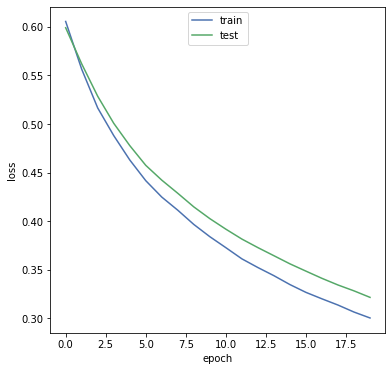

In [48]:
plt.figure(1, figsize=(6,6))
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

#plt.yscale("log")
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.xlim(-0.5,20.1)
plt.legend(['train', 'test'], loc='upper center')

from google.colab import files
plt.savefig('loss_MLP.eps')
#files.download('loss_MLP.eps') # Descomentar para descargar localmente

En la siguiente gráfica se visualiza la evolución de la calidad de la clasificación para el conjunto de entrenamiento y test en función de las épocas.

In [ ]:
print('V1','V2','\t\t','Real','\t','Pronóstico')
for i in range(len(testY)):
  print(i, testX[i],'\t',testY[i],'\t',pred[i])

test 0s number:   85
test 1s number:   215


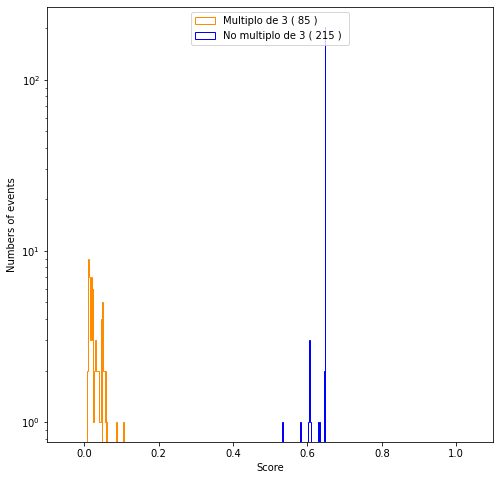

In [49]:
plt.figure(1,figsize=(8,8)) # figura numero 4
plt.style.use('seaborn-deep') 
#plt.hist(pred,100,histtype='step')
# seleccionamos los datos que cumplen que testY==0 es argo
c=np.where(testY==0)
print("test 0s number:  ",len(c[0]))
plt.hist(pred[c[0]],50,histtype='step',color='darkorange', label= "Multiplo de 3 ( %d ) " % (len(c[0]) ))
# selecionamos los de cuello testY==1
c=np.where(testY==1)
print("test 1s number:  ", len(c[0]))
plt.hist(pred[c[0]],50,histtype='step',color='blue', label= "No multiplo de 3 ( %d ) " % (len(c[0]) ))
plt.ylabel('Numbers of events')
plt.xlabel('Score')
plt.yscale("log")
plt.xlim(-0.1,1.1)
plt.legend( loc='upper center')

## Interpretabilidad con Shap



In [38]:
!pip install shap
!pip install seaborn

     |████████████████████████████████| 356 kB 4.3 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491652 sha256=626176ee67b458539e9f65b29703df03290a03a8865662f4e18b2579df6d7b14
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [39]:
import shap
shap.initjs()

In [ ]:
# Solo funciona con la versióón 1.15 de tensorFlow.
#explainer_M3XAI = shap.DeepExplainer(model, trainX)

In [50]:

explainer_M3XAI = shap.KernelExplainer(model, trainX[0:100]) 

In [51]:
# El resultado es una lista que incluye un solo array en su interior, por eso siempre pongo shap_values[0]
shap_values = explainer_M3XAI.shap_values(trainX)
print(shap_values)

  0%|          | 0/700 [00:00<?, ?it/s]

[array([[-0.00057905,  0.00022364, -0.00026378,  0.19925968],
       [ 0.00319769,  0.00408234,  0.00437569,  0.18698478],
       [ 0.0019411 ,  0.00033109,  0.00205066,  0.19431764],
       ...,
       [ 0.0019079 , -0.0005847 , -0.00207136,  0.19938865],
       [ 0.00066099,  0.0010326 ,  0.00234717,  0.19459975],
       [-0.0005551 , -0.00367192, -0.00375267,  0.20662019]])]


Gráfico ejemplo donde se muestra ordenadamente la importancia de cada una de las variables para un conjunto de datos, en este caso para el conjunto de entrenamiento.

Texto extraído de:

https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d


This plot is made of all the dots in the train data. It demonstrates the following information:

*    Feature importance: Variables are ranked in descending order.
*    Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
*    Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.


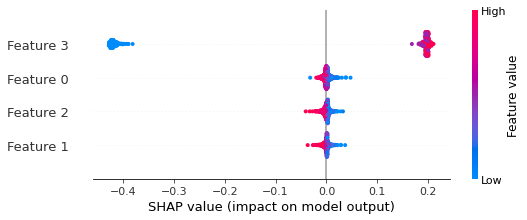

In [52]:
shap.summary_plot(shap_values[0], trainX, max_display = 4)

Gráfico en cascada para un solo ejemplo: el ejemplo del testset de índice idx. Este es un ejemplo de interpretación de una sola instancia y no de un conjunto de instancias.

Input:  [2 3 8 2] , con etiqueta:  1


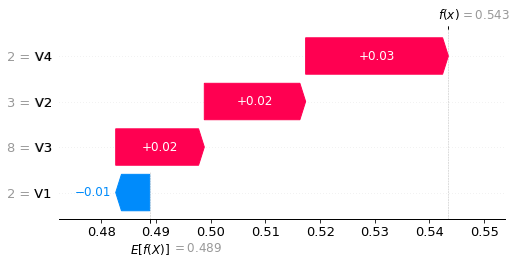

In [44]:
# Explabilidad del ejemplo 9 de trainX. 
idx=9
print("Input: ", trainX[idx], ", con etiqueta: ",trainY[idx])

def myexplanation(shap_values, idx):
    my_exp = shap.Explanation(
    values =  shap_values[idx,:],
    data = trainX[idx,:],
    feature_names = dfnew.columns,
    base_values = explainer_M3XAI.expected_value[0])
    return my_exp

# Con max_display se controla el número de variables a mostrar.
shap.plots.waterfall( myexplanation(shap_values[0], idx), max_display = 4)

Input:  [8 6 8 2] , con etiqueta:  1


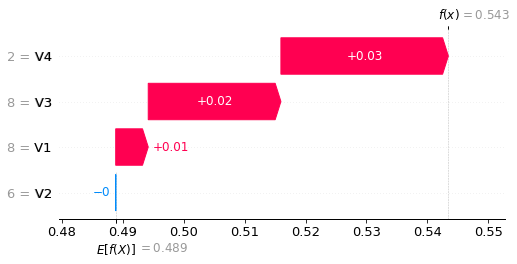

In [43]:
idx=8
print("Input: ", trainX[idx], ", con etiqueta: ",trainY[idx])

def myexplanation(shap_values, idx):
    my_exp = shap.Explanation(
    values =  shap_values[idx,:],
    data = trainX[idx,:],
    feature_names = dfnew.columns,
    base_values = explainer_M3XAI.expected_value[0])
    return my_exp

# Con max_display se controla el número de variables a mostrar.
shap.plots.waterfall( myexplanation(shap_values[0], idx), max_display = 4)

Input:  [3 5 9 2] , con etiqueta:  1


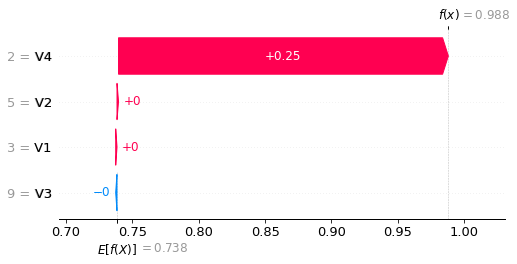

In [ ]:
idx=4
print("Input: ", trainX[idx], ", con etiqueta: ",trainY[idx])

def myexplanation(shap_values, idx):
    my_exp = shap.Explanation(
    values =  shap_values[idx,:],
    data = trainX[idx,:],
    feature_names = dfnew.columns,
    base_values = explainer_M3XAI.expected_value[0])
    return my_exp
# Con max_display se controla el número de variables a mostrar.
shap.plots.waterfall( myexplanation(shap_values[0], idx), max_display = 4)

## Propuestas adicionales.

*   Entender como funciona Shap como algoritmo de XAI y las imágenes generadas en este ejemplo. 
*   Modificar el código retirando la variable V4 de las variables independiente. Entrenar la red y visualizar la importancia de las variables.